# Import

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
# Permet de retirer les warning message du a l'import des fichier excel.xlsx
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

# permet d'afficher toute les colonne d'un head
# pd.set_option('max_columns', None)
# pd.options.display.max_rows = 999

# permet d'afficher toute les ligne d'un head
# pd.set_option('max_rows', None)

# Reset de l'affichage des colonnes et ligne
# pd.reset_option('max_columns')
pd.reset_option('max_rows')

# Read CSV


## Dispo alimentaire 2017

In [273]:
df_dispo_alim = pd.read_csv("data/DisponibiliteAlimentaire_2017.csv")
print(df_dispo_alim['Produit'].unique())
print(df_dispo_alim['Zone'].nunique())

['Blé et produits' 'Riz et produits' 'Orge et produits' 'Maïs et produits'
 'Seigle et produits' 'Avoine' 'Millet et produits' 'Sorgho et produits'
 'Céréales, Autres' 'Pommes de Terre et produits' 'Ignames' 'Racines nda'
 'Sucre, canne' 'Sucre, betterave' 'Sucre Eq Brut' 'Edulcorants Autres'
 'Miel' 'Haricots' 'Pois' 'Légumineuses Autres et produits'
 'Noix et produits' 'Soja' 'Arachides Decortiquees' 'Graines de tournesol'
 'Graines Colza/Moutarde' 'Graines de coton' 'Coco (Incl Coprah)' 'Sésame'
 'Olives' 'Plantes Oleiferes, Autre' 'Huile de Soja' "Huile d'Arachide"
 'Huile de Tournesol' 'Huile de Colza&Moutarde' 'Huile Graines de Coton'
 'Huile de Palmistes' 'Huile de Palme' 'Huile de Coco' 'Huile de Sésame'
 "Huile d'Olive" 'Huile de Son de Riz' 'Huile de Germe de Maïs'
 'Huil Plantes Oleif Autr' 'Tomates et produits' 'Oignons'
 'Légumes, Autres' 'Oranges, Mandarines' 'Citrons & Limes et produits'
 'Pamplemousse et produits' 'Agrumes, Autres' 'Bananes'
 'Pommes et produits' 'Anana

In [274]:
# filtre sur la viande de volailles
df_dispo_alim = df_dispo_alim[df_dispo_alim['Produit'] == 'Viande de Volailles'].reset_index()
# je drop les colonne qui ne m'interresse pas
df_dispo_alim.drop(['index','Code Domaine','Produit', 'Domaine','Code zone','Code Élément','Code année','Code Produit','Symbole', 'Description du Symbole','Unité'],  axis=1, inplace=True)
df_dispo_alim.head()

,Zone,Élément,Année,Valeur
0,Afghanistan,Production,2017,28.0
1,Afghanistan,Importations - Quantité,2017,29.0
2,Afghanistan,Variation de stock,2017,0.0
3,Afghanistan,Disponibilité intérieure,2017,57.0
4,Afghanistan,Pertes,2017,2.0


In [275]:
# je pivot élément pour avoir mes colonnes
df_dispo_alim = df_dispo_alim.pivot_table(index=['Zone'], columns='Élément', values='Valeur', aggfunc=sum)
# je fait la moyenne de mes null sur les colonnes et je garde les colonne qui sont sous mes 0.8 de moyenne soit 80%
df_dispo_alim = df_dispo_alim[df_dispo_alim.columns[df_dispo_alim.isnull().mean() < 0.8]]
df_dispo_alim.fillna(0, inplace = True)
df_dispo_alim = df_dispo_alim.loc[:,["Importations - Quantité", "Nourriture", "Production", "Exportations - Quantité"]]
df_dispo_alim.head()

Élément,Importations - Quantité,Nourriture,Production,Exportations - Quantité
Zone,,,,
Afghanistan,29.0,55.0,28.0,0.0
Afrique du Sud,514.0,2035.0,1667.0,63.0
Albanie,38.0,47.0,13.0,0.0
Algérie,2.0,264.0,275.0,0.0
Allemagne,842.0,1609.0,1514.0,646.0


In [276]:
df_total_conso = pd.read_csv("data/DisponibiliteAlimentaire_2017.csv")
# Je drop les colonne qui ne m'interresse pas
df_total_conso.drop(['Code zone','Code Élément','Code Produit','Code année','Année'],  axis=1, inplace=True)
# Je focus sur la nourriture
df_total_conso = df_total_conso[df_total_conso['Élément']=='Nourriture']
# puis sur les produit de type viande
df_total_conso = df_total_conso[df_total_conso['Produit'].str.startswith('Viande')]
#je fait la somme de la consomation total de viande par pays en 2017
df_total_conso = df_total_conso.groupby(by=['Zone']).sum('Valeur')
df_total_conso = df_total_conso.rename(columns={'Valeur': 'Conso Viande Total'})
df_total_conso.head()

,Conso Viande Total
Zone,
Afghanistan,312.0
Afrique du Sud,3422.0
Albanie,136.0
Algérie,748.0
Allemagne,7255.0


In [277]:
df_dispo_alim = pd.merge(df_dispo_alim, df_total_conso, on='Zone', how='left')
df_dispo_alim.head()

,Importations - Quantité,Nourriture,Production,Exportations - Quantité,Conso Viande Total
Zone,,,,,
Afghanistan,29.0,55.0,28.0,0.0,312.0
Afrique du Sud,514.0,2035.0,1667.0,63.0,3422.0
Albanie,38.0,47.0,13.0,0.0,136.0
Algérie,2.0,264.0,275.0,0.0,748.0
Allemagne,842.0,1609.0,1514.0,646.0,7255.0


## Valeur Pop

In [278]:
df_population = pd.read_csv("data/Population_2000_2018.csv")
df_population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [279]:
df_population = df_population[df_population['Année'] == 2017].reset_index()
df_population.drop(['index','Code Domaine','Domaine','Code zone','Code Élément','Élément','Code Produit','Produit','Unité','Code année','Année','Symbole','Description du Symbole','Note'],  axis=1, inplace=True)
df_population = df_population.rename(columns={'Valeur': 'Valeur Pop 2017'})
df_population['Valeur Pop 2017'] = (df_population['Valeur Pop 2017']*1000).astype(np.int64)
df_population.head()

,Zone,Valeur Pop 2017
0,Afghanistan,36296113
1,Afrique du Sud,57009756
2,Albanie,2884169
3,Algérie,41389189
4,Allemagne,82658409


In [280]:
df_final = pd.merge(df_dispo_alim, df_population, on='Zone', how='left')
df_final.head()

,Zone,Importations - Quantité,Nourriture,Production,Exportations - Quantité,Conso Viande Total,Valeur Pop 2017
0,Afghanistan,29.0,55.0,28.0,0.0,312.0,36296113
1,Afrique du Sud,514.0,2035.0,1667.0,63.0,3422.0,57009756
2,Albanie,38.0,47.0,13.0,0.0,136.0,2884169
3,Algérie,2.0,264.0,275.0,0.0,748.0,41389189
4,Allemagne,842.0,1609.0,1514.0,646.0,7255.0,82658409


## Evolution taux de population

In [281]:
df_evo_taux_pop = pd.read_csv("data/Population_2000_2018.csv")
df_evo_taux_pop.drop(['Code Domaine','Domaine','Code zone','Code Élément','Élément','Code Produit','Produit','Unité','Code année','Symbole','Description du Symbole','Note'],  axis=1, inplace=True)
df_evo_taux_pop['Taux évolution population'] = df_evo_taux_pop.sort_values(['Année']).groupby('Zone')[['Valeur']].pct_change()
df_evo_taux_pop['Taux évolution population'] = df_evo_taux_pop['Taux évolution population'].fillna(df_evo_taux_pop.groupby('Zone')['Taux évolution population'].transform('mean'))
df_evo_taux_pop = df_evo_taux_pop.groupby(['Zone'], as_index=False).median()
df_evo_taux_pop = df_evo_taux_pop[['Zone', 'Taux évolution population']]
df_final = pd.merge(df_final, df_evo_taux_pop,  on='Zone', how='left')

In [282]:
df_final.head()

,Zone,Importations - Quantité,Nourriture,Production,Exportations - Quantité,Conso Viande Total,Valeur Pop 2017,Taux évolution population
0,Afghanistan,29.0,55.0,28.0,0.0,312.0,36296113,0.031930
1,Afrique du Sud,514.0,2035.0,1667.0,63.0,3422.0,57009756,0.014013
2,Albanie,38.0,47.0,13.0,0.0,136.0,2884169,-0.004211
3,Algérie,2.0,264.0,275.0,0.0,748.0,41389189,0.017370
4,Allemagne,842.0,1609.0,1514.0,646.0,7255.0,82658409,0.000972


In [283]:
print(df_final.shape)
print(df_evo_taux_pop['Zone'].nunique())

(172, 8)
238


In [284]:
# changer les valeur au nombre par habitant. Passer en kg puis diviser par la population total du pays en 2017
df_final['Importation (kg/pers)'] = round(df_final['Importations - Quantité']*1000000/df_final['Valeur Pop 2017'], 2)
df_final['Nourriture Volaille (kg/pers)'] = round(df_final['Nourriture']*1000000/df_final['Valeur Pop 2017'], 2)
df_final['Viande Total (kg/pers)'] = round(df_final['Conso Viande Total']*1000000/df_final['Valeur Pop 2017'], 2)
df_final['Exportation (kg/pers)'] = round(df_final['Exportations - Quantité']*1000000/df_final['Valeur Pop 2017'], 2)
df_final['Production (kg/pers)'] = round(df_final['Production']*1000000/df_final['Valeur Pop 2017'], 2)

# calculer sur la totalité des viandes combien sont de type volaille
df_final['Nourriture Volaille/Total (%)'] = round(df_final['Nourriture Volaille (kg/pers)']*100/df_final['Viande Total (kg/pers)'], 2)
df_final = df_final.drop(columns = ['Importations - Quantité', 'Nourriture', 'Conso Viande Total', 'Production', 'Exportations - Quantité'])
df_final.head()

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%)
0,Afghanistan,36296113,0.031930,0.80,1.52,8.60,0.00,0.77,17.67
1,Afrique du Sud,57009756,0.014013,9.02,35.70,60.02,1.11,29.24,59.48
2,Albanie,2884169,-0.004211,13.18,16.30,47.15,0.00,4.51,34.57
3,Algérie,41389189,0.017370,0.05,6.38,18.07,0.00,6.64,35.31
4,Allemagne,82658409,0.000972,10.19,19.47,87.77,7.82,18.32,22.18


## Stabilité politique

Récup depuis le project 8

In [285]:
df_politic_stability = pd.read_csv("data/political_stability.csv")
df_politic_stability.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6121,Valeur,21035,Taux de dépendance à l'égard des importations ...,20162018,2016-2018,%,41.3,E,Valeur estimée,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6121,Valeur,21034,Pourcentage des terres arables aménagées pour ...,20162018,2016-2018,%,41.4,E,Valeur estimée,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20162018,2016-2018,%,363.0,E,Valeur estimée,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.8,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,4,Afghanistan,6127,Valeur,21030,Variabilité de la production alimentaire par h...,2017,2017,1000 I$,6.8,E,Valeur estimée,NaN


In [286]:
df_politic_stability = df_politic_stability[df_politic_stability['Année'] == '2017']
df_politic_stability = df_politic_stability.pivot_table(index=['Zone'], columns='Produit', values='Valeur', aggfunc=sum).reset_index()
df_politic_stability.head()

Produit,Zone,Stabilité politique et absence de violence/terrorisme (indice),Variabilité de la production alimentaire par habitant ($I par personne constant 2014-16),Variabilité des disponibilités alimentaires par habitant (Kcal/personne/jour)
0,Afghanistan,-2.80,6.8,27.0
1,Afrique du Sud,-0.28,15.7,21.0
2,Albanie,0.38,9.2,42.0
3,Algérie,-0.92,10.3,27.0
4,Allemagne,0.59,16.4,14.0


In [287]:
df_politic_stability.drop(['Variabilité de la production alimentaire par habitant ($I par personne constant 2014-16)', 'Variabilité des disponibilités alimentaires par habitant (Kcal/personne/jour)'],  axis=1, inplace=True)
print(df_politic_stability['Zone'].nunique())
df_politic_stability.head()

204


Produit,Zone,Stabilité politique et absence de violence/terrorisme (indice)
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59


In [288]:
df_final = pd.merge(df_final, df_politic_stability,  on='Zone', how='left')
print(df_final['Stabilité politique et absence de violence/terrorisme (indice)'].nunique())
print(df_final['Stabilité politique et absence de violence/terrorisme (indice)'].isna().sum())

130
3


In [289]:
df_final.head()

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice)
0,Afghanistan,36296113,0.031930,0.80,1.52,8.60,0.00,0.77,17.67,-2.80
1,Afrique du Sud,57009756,0.014013,9.02,35.70,60.02,1.11,29.24,59.48,-0.28
2,Albanie,2884169,-0.004211,13.18,16.30,47.15,0.00,4.51,34.57,0.38
3,Algérie,41389189,0.017370,0.05,6.38,18.07,0.00,6.64,35.31,-0.92
4,Allemagne,82658409,0.000972,10.19,19.47,87.77,7.82,18.32,22.18,0.59


In [290]:
df_final[df_final['Stabilité politique et absence de violence/terrorisme (indice)'].isna()]

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice)
34,"Chine, continentale",1421021791,0.005616,0.32,12.33,59.90,0.41,12.83,20.58,NaN
108,Nouvelle-Calédonie,277150,0.013912,32.47,39.69,72.16,0.00,3.61,55.00,NaN
120,Polynésie française,276102,0.005561,54.33,47.08,94.17,0.00,3.62,49.99,NaN


## Pib

In [291]:
df_pib = pd.read_csv("data/indicateur_macro.csv")
df_pib.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,18896.352021,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,520.616409,X,Sources internationales sûres,NaN
2,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22015,Formation brute de capital fixe,2017,2017,millions,2552.410075,X,Sources internationales sûres,NaN
3,MK,Indicateurs macro,2,Afghanistan,6103,Part du PIB US $,22015,Formation brute de capital fixe,2017,2017,%,13.507422,Fc,Donnée calculée,NaN
4,MK,Indicateurs macro,202,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,349006.689642,X,Sources internationales sûres,NaN


In [292]:
df_pib = df_pib[(df_pib['Année'] == '2017') | (df_pib['Élément'] == 'Valeur US $ par habitant')]
df_pib = df_pib.pivot_table(index=['Zone'], columns='Produit', values='Valeur', aggfunc=sum).reset_index()
df_pib.head()

Produit,Zone,Produit Intérieur Brut
0,Afghanistan,520.616409
1,Afrique du Sud,6121.876572
2,Albanie,4514.204908
3,Algérie,4109.696001
4,Allemagne,44651.829102


In [293]:
df_pib = df_pib.rename(columns={'Produit Intérieur Brut': 'PIB (Valeur us$/Habitant)'})
print(df_pib['Zone'].nunique())
df_pib.head()

211


Produit,Zone,PIB (Valeur us$/Habitant)
0,Afghanistan,520.616409
1,Afrique du Sud,6121.876572
2,Albanie,4514.204908
3,Algérie,4109.696001
4,Allemagne,44651.829102


In [294]:
df_final = pd.merge(df_final, df_pib,  on='Zone', how='left')

## Sous alimentation & accés a l'eau

### Sous alimentation

In [295]:
df_alim_water = pd.read_csv("data/Sous_aliment_Water_service.csv")
df_alim_water.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,8.3,E,Valeur estimée,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6121,Valeur,210401,Prévalence de l’insécurité alimentaire grave –...,20162018,2016-2018,%,17.3,E,Valeur estimée,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6121,Valeur,210401M,Prévalence de l’insécurité alimentaire grave –...,20162018,2016-2018,%,15.3,E,Valeur estimée,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6121,Valeur,210401F,Prévalence de l’insécurité alimentaire grave –...,20162018,2016-2018,%,19.4,E,Valeur estimée,NaN
4,FS,Données de la sécurité alimentaire,4,Afghanistan,6121,Valeur,21045,Pourcentage de la population ayant accès à des...,2017,2017,%,25.1,X,Ciffre de sources internationales,NaN


In [296]:
df_sous_alim = df_alim_water[df_alim_water['Produit'] == 'Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)'].copy()

In [297]:
df_sous_alim = df_sous_alim.drop(['Code Domaine','Domaine','Code zone (M49)','Code Élément','Élément','Code Produit','Code année','Unité','Symbole','Description du Symbole','Note'],  axis=1)
df_sous_alim = df_sous_alim.pivot_table(index=['Zone'], columns='Produit', values='Valeur', aggfunc=sum).reset_index()
df_sous_alim.head()

Produit,Zone,Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)
0,Afghanistan,8.3
1,Afrique du Sud,3.1
2,Albanie,0.1
3,Algérie,1.1
4,Allemagne,0


In [298]:
df_final = pd.merge(df_final, df_sous_alim,  on='Zone', how='left')
df_final.head()

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)
0,Afghanistan,36296113,0.031930,0.80,1.52,8.60,0.00,0.77,17.67,-2.80,520.616409,8.3
1,Afrique du Sud,57009756,0.014013,9.02,35.70,60.02,1.11,29.24,59.48,-0.28,6121.876572,3.1
2,Albanie,2884169,-0.004211,13.18,16.30,47.15,0.00,4.51,34.57,0.38,4514.204908,0.1
3,Algérie,41389189,0.017370,0.05,6.38,18.07,0.00,6.64,35.31,-0.92,4109.696001,1.1
4,Allemagne,82658409,0.000972,10.19,19.47,87.77,7.82,18.32,22.18,0.59,44651.829102,0


### Accés a l'eau

Je garde que l'eau de base car l'acces a l'eau en toutes sécurité me donne 64 NaN

In [299]:

df_water_service = df_alim_water[df_alim_water['Produit'] == 'Pourcentage de la population utilisant au moins les services d\'eau de base'].copy()
df_water_service = df_water_service.drop(['Code Domaine','Domaine','Code zone (M49)','Code Élément','Élément','Code Produit','Code année','Unité','Symbole','Description du Symbole','Note'],  axis=1)
df_water_service = df_water_service.pivot_table(index=['Zone'], columns='Produit', values='Valeur', aggfunc=sum).reset_index()
df_water_service = df_water_service.rename(columns={
    'Pourcentage de la population utilisant au moins les services d\'eau de base':'% population utilisant au moins les services d\'eau de base'})
df_water_service.head()

Produit,Zone,% population utilisant au moins les services d'eau de base
0,Afghanistan,66.8
1,Afrique du Sud,92.7
2,Albanie,94.1
3,Algérie,93.8
4,Allemagne,99


In [300]:
df_final = pd.merge(df_final, df_water_service,  on='Zone', how='left')
df_final.head()

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),% population utilisant au moins les services d'eau de base
0,Afghanistan,36296113,0.031930,0.80,1.52,8.60,0.00,0.77,17.67,-2.80,520.616409,8.3,66.8
1,Afrique du Sud,57009756,0.014013,9.02,35.70,60.02,1.11,29.24,59.48,-0.28,6121.876572,3.1,92.7
2,Albanie,2884169,-0.004211,13.18,16.30,47.15,0.00,4.51,34.57,0.38,4514.204908,0.1,94.1
3,Algérie,41389189,0.017370,0.05,6.38,18.07,0.00,6.64,35.31,-0.92,4109.696001,1.1,93.8
4,Allemagne,82658409,0.000972,10.19,19.47,87.77,7.82,18.32,22.18,0.59,44651.829102,0,99


## Production poulets

Trop de null ici sa saute !

In [301]:
## Pas garder pour cause de trop de NaN

# df_prod_poulet = pd.read_csv("Prix_a_la_production.csv")

# df_prod_poulet = df_prod_poulet[df_prod_poulet['Élément'] == 'Prix à la Production (USD/tonne)'].copy()
# df_prod_poulet = df_prod_poulet.loc[:, ['Zone','Élément', 'Valeur']]
# df_prod_poulet = df_prod_poulet.pivot_table(index=['Zone'], columns='Élément', values='Valeur', aggfunc=sum).reset_index()
# df_prod_poulet = df_prod_poulet.rename(columns={
#     'Prix à la Production (USD/tonne)':'Prix à la Production (USD/tonne) poulet'})

# df_final = pd.merge(df_final, df_prod_poulet,  on='Zone', how='left')
# df_final.head()

In [302]:
print(df_final['Zone'].nunique())
print(df_final.isna().sum())

172
Zone                                                                  0
Valeur Pop 2017                                                       0
Taux évolution population                                             0
Importation (kg/pers)                                                 0
Nourriture Volaille (kg/pers)                                         0
Viande Total (kg/pers)                                                2
Exportation (kg/pers)                                                 0
Production (kg/pers)                                                  0
Nourriture Volaille/Total (%)                                         2
Stabilité politique et absence de violence/terrorisme (indice)        3
PIB (Valeur us$/Habitant)                                             1
Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)    0
% population utilisant au moins les services d'eau de base            4
dtype: int64


In [303]:
df_final.shape

(172, 13)

# Nettoyage

ici je décide de ne pas supprimer mes ligne NaN.
j'ai soit retrouvé les valeurs manquantes, soit remplacé par la médiane.

In [304]:
# ici je check mes null
df_final[df_final.isna().any(axis=1)]

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),% population utilisant au moins les services d'eau de base
8,Argentine,43937140,0.010328,0.18,42.24,109.36,4.71,49.18,38.62,0.17,14648.845969,1.4,NaN
33,"Chine, Taiwan Province de",23674546,0.003714,6.80,33.16,77.55,0.34,27.54,42.76,0.86,NaN,0.9,NaN
34,"Chine, continentale",1421021791,0.005616,0.32,12.33,59.90,0.41,12.83,20.58,NaN,8663.126784,0,NaN
39,Croatie,4182857,-0.003481,5.74,10.76,75.31,4.06,14.58,14.29,0.69,13439.243178,0,NaN
108,Nouvelle-Calédonie,277150,0.013912,32.47,39.69,72.16,0.00,3.61,55.00,NaN,33101.384336,<0.1,98.6
113,Ouzbékistan,31959785,0.015872,0.00,0.00,NaN,0.00,0.00,NaN,-0.24,1851.074677,0,97.8
120,Polynésie française,276102,0.005561,54.33,47.08,94.17,0.00,3.62,49.99,NaN,21127.527814,<0.1,99
130,République démocratique populaire lao,6953035,0.015658,0.00,0.00,NaN,0.00,0.00,NaN,0.40,2455.211675,0.4,81.5


In [305]:
# sur les 2 col si dessous je remplace la valeur par 0 car c'est col ont était créer suite a mes calcule
df_final.fillna({'Viande Total (kg/pers)': 0, 'Nourriture Volaille/Total (%)': 0,}, inplace=True)
df_final[df_final.isna().any(axis=1)]

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),% population utilisant au moins les services d'eau de base
8,Argentine,43937140,0.010328,0.18,42.24,109.36,4.71,49.18,38.62,0.17,14648.845969,1.4,NaN
33,"Chine, Taiwan Province de",23674546,0.003714,6.80,33.16,77.55,0.34,27.54,42.76,0.86,NaN,0.9,NaN
34,"Chine, continentale",1421021791,0.005616,0.32,12.33,59.90,0.41,12.83,20.58,NaN,8663.126784,0,NaN
39,Croatie,4182857,-0.003481,5.74,10.76,75.31,4.06,14.58,14.29,0.69,13439.243178,0,NaN
108,Nouvelle-Calédonie,277150,0.013912,32.47,39.69,72.16,0.00,3.61,55.00,NaN,33101.384336,<0.1,98.6
120,Polynésie française,276102,0.005561,54.33,47.08,94.17,0.00,3.62,49.99,NaN,21127.527814,<0.1,99


## Chine null

In [306]:
# https://www.theglobaleconomy.com/china/wb_political_stability/ political stability mis a jour
df_final.loc[df_final['Zone']=='Chine, continentale', ['Stabilité politique et absence de violence/terrorisme (indice)']] = -0.27
df_final.loc[df_final['Zone']=='Chine, continentale', ['% population utilisant au moins les services d\'eau de base']] = 94.70

## Argentine null

In [307]:
# n'ayant pas trouver et pour une colonne si peux importante j'impute la médiane comme valeur
df_final.loc[df_final['Zone']=='Argentine', ['% population utilisant au moins les services d\'eau de base']] = df_final['% population utilisant au moins les services d\'eau de base'].median()

In [308]:
df_final.loc[df_final['Zone']=='Argentine']

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),% population utilisant au moins les services d'eau de base
8,Argentine,43937140,0.010328,0.18,42.24,109.36,4.71,49.18,38.62,0.17,14648.845969,1.4,95.4


## Taiwan null

In [309]:
# ici je garde la mediane sur pib car de ce que j'ai vu c'est pas si loins que ca. (2022 pib = 5k6)
df_final.loc[df_final['Zone']=='Chine, Taiwan Province de', ['PIB (Valeur us$/Habitant)']] = df_final['PIB (Valeur us$/Habitant)'].median()
df_final.loc[df_final['Zone']=='Chine, Taiwan Province de', ['% population utilisant au moins les services d\'eau de base']] = df_final['% population utilisant au moins les services d\'eau de base'].median()
df_final.loc[df_final['Zone']=='Chine, Taiwan Province de']

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),% population utilisant au moins les services d'eau de base
33,"Chine, Taiwan Province de",23674546,0.003714,6.8,33.16,77.55,0.34,27.54,42.76,0.86,6101.130428,0.9,95.4


## Croatie Null

In [310]:
df_final.loc[df_final['Zone']=='Croatie', ['% population utilisant au moins les services d\'eau de base']] = 93.50
df_final.loc[df_final['Zone']=='Croatie']

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),% population utilisant au moins les services d'eau de base
39,Croatie,4182857,-0.003481,5.74,10.76,75.31,4.06,14.58,14.29,0.69,13439.243178,0,93.5


## Polynésie fr et Nouvelle-Calédonie

In [311]:
# pour la polynésie francaise et la nouvelle calédonie j'impute a la stabilité politique la valeur de la france car je n'ai pas pu trouver
df_final.fillna(0.28, inplace=True)
df_final.loc[df_final['Zone']=='Nouvelle-Calédonie']

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),% population utilisant au moins les services d'eau de base
108,Nouvelle-Calédonie,277150,0.013912,32.47,39.69,72.16,0.0,3.61,55.0,0.28,33101.384336,<0.1,98.6


In [312]:
df_final.loc[df_final['Zone']=='Polynésie française']

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),% population utilisant au moins les services d'eau de base
120,Polynésie française,276102,0.005561,54.33,47.08,94.17,0.0,3.62,49.99,0.28,21127.527814,<0.1,99


In [313]:
df_final[df_final.isna().any(axis=1)]

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),% population utilisant au moins les services d'eau de base


## les <0.1 dans les ligne

In [314]:
df_final[df_final['Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)'] == '<0.1']

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),% population utilisant au moins les services d'eau de base
9,Arménie,2944791,-0.003730,11.89,15.96,45.50,0.00,3.74,35.08,-0.62,3914.525246,<0.1,99
15,Barbade,286232,0.003306,6.99,45.42,69.87,0.00,52.41,65.01,0.97,17419.313704,<0.1,98.5
17,Belize,375769,0.024818,0.00,26.61,39.92,0.00,53.22,66.66,0.04,4909.683057,<0.1,98
26,Cabo Verde,537498,0.012747,22.33,16.74,31.63,0.00,1.86,52.92,0.77,3292.638357,<0.1,87.1
32,Chine - RAS de Macao,622585,0.022453,36.94,33.73,101.19,0.00,4.82,33.33,1.43,81043.968656,<0.1,99
44,Dominique,71458,0.001379,55.98,41.98,69.97,0.00,0.00,60.00,1.20,7286.797839,<0.1,95.4
49,Fidji,877459,0.004342,3.42,28.49,43.31,0.00,26.21,65.78,0.62,6101.130428,<0.1,94.3
61,Guyana,775222,0.002298,0.00,38.70,46.44,0.00,39.99,83.33,-0.04,6124.922066,<0.1,95.5
80,Kiribati,114158,0.017498,8.76,17.52,26.28,0.00,8.76,66.67,0.88,1648.572671,<0.1,75.5
88,Macédoine du Nord,2081996,0.000864,19.21,19.69,36.50,0.48,0.96,53.95,-0.25,5430.875559,<0.1,97.6


In [315]:
# je remplace les valeur "<0.01" par "0.1"
df_final["Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)"] = df_final["Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)"].replace({'<':''}, regex=True)
df_final[df_final['Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)'] == '<0.1']

,Zone,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),% population utilisant au moins les services d'eau de base


In [316]:
df_final.isna().sum()

Zone                                                                  0
Valeur Pop 2017                                                       0
Taux évolution population                                             0
Importation (kg/pers)                                                 0
Nourriture Volaille (kg/pers)                                         0
Viande Total (kg/pers)                                                0
Exportation (kg/pers)                                                 0
Production (kg/pers)                                                  0
Nourriture Volaille/Total (%)                                         0
Stabilité politique et absence de violence/terrorisme (indice)        0
PIB (Valeur us$/Habitant)                                             0
Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)    0
% population utilisant au moins les services d'eau de base            0
dtype: int64

In [266]:
df_final = df_final.set_index('Zone')
df_final.head()

,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),% population utilisant au moins les services d'eau de base
Zone,,,,,,,,,,,,
Afghanistan,36296113,0.031930,0.80,1.52,8.60,0.00,0.77,17.67,-2.80,520.616409,8.3,66.8
Afrique du Sud,57009756,0.014013,9.02,35.70,60.02,1.11,29.24,59.48,-0.28,6121.876572,3.1,92.7
Albanie,2884169,-0.004211,13.18,16.30,47.15,0.00,4.51,34.57,0.38,4514.204908,0.1,94.1
Algérie,41389189,0.017370,0.05,6.38,18.07,0.00,6.64,35.31,-0.92,4109.696001,1.1,93.8
Allemagne,82658409,0.000972,10.19,19.47,87.77,7.82,18.32,22.18,0.59,44651.829102,0,99


# Outliers

In [267]:
df_final.describe()

,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant)
count,1.720000e+02,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,4.284175e+07,0.013730,10.890756,20.176047,48.410407,3.446453,15.956744,40.337733,-0.061395,13998.001581
std,1.530637e+08,0.011918,18.607640,15.983285,30.130535,11.157379,17.283204,20.966469,0.893960,19358.817832
min,5.204500e+04,-0.012442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.940000,450.900697
25%,2.874480e+06,0.004902,0.380000,6.157500,20.200000,0.000000,2.090000,23.330000,-0.622500,2009.670178
50%,9.757833e+06,0.012828,3.685000,17.830000,45.970000,0.000000,9.425000,38.440000,0.015000,6101.130428
75%,3.013874e+07,0.022500,11.720000,30.000000,71.712500,1.480000,24.675000,55.067500,0.650000,16757.054056
max,1.421022e+09,0.053814,124.140000,72.840000,137.140000,90.740000,76.300000,86.620000,1.600000,111017.182246


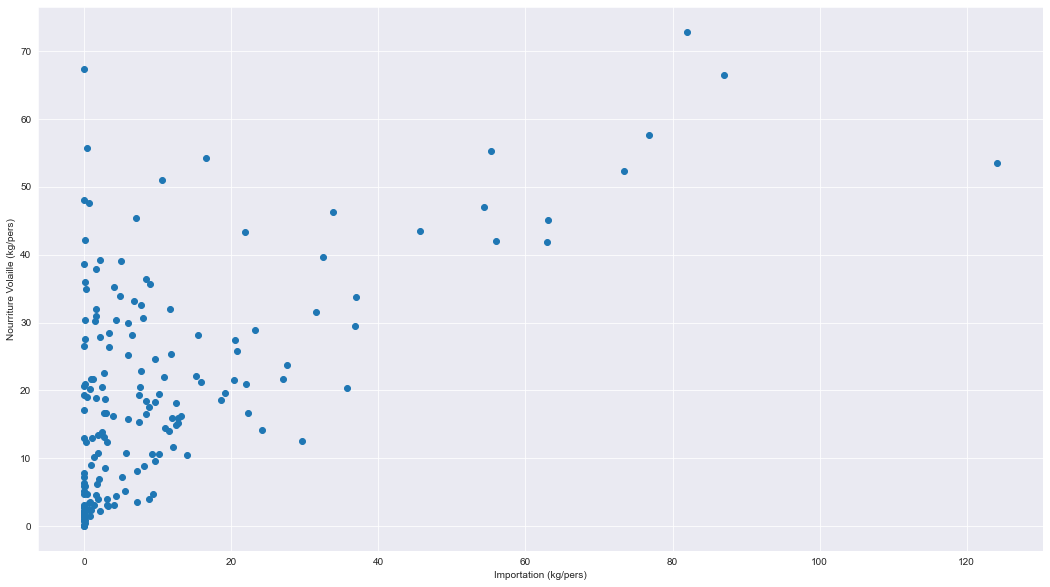

In [317]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_final['Importation (kg/pers)'], df_final['Nourriture Volaille (kg/pers)'])

# x-axis label
ax.set_xlabel('Importation (kg/pers)')

# y-axis label
ax.set_ylabel('Nourriture Volaille (kg/pers)')
plt.show()

In [269]:
df_final[df_final['Importation (kg/pers)'] > 100]

,Valeur Pop 2017,Taux évolution population,Importation (kg/pers),Nourriture Volaille (kg/pers),Viande Total (kg/pers),Exportation (kg/pers),Production (kg/pers),Nourriture Volaille/Total (%),Stabilité politique et absence de violence/terrorisme (indice),PIB (Valeur us$/Habitant),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),% population utilisant au moins les services d'eau de base
Zone,,,,,,,,,,,,
Chine - RAS de Hong-Kong,7306322,0.00602,124.14,53.52,137.14,90.74,3.28,39.03,0.83,46705.027813,0,99


In [270]:
df_final.duplicated().sum()

0

# to_csv

In [271]:
df_final.to_csv('data/data_final.csv')